In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.0 MB/s eta 0:00:00


#Encoding categorical data

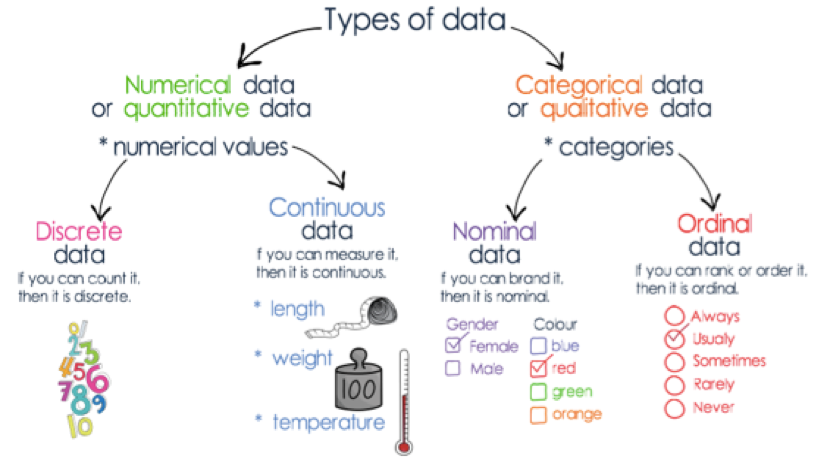

Categorical data, also known as qualitative or discrete data, is data that represents characteristics or attributes with distinct categories or labels, but lacks numerical values or a natural ordering. 

* Examples of categorical data include gender (male/female), marital status (married/single/divorced), and education level (high school/bachelor's/master's/PhD). 

* In machine learning, categorical data needs to be encoded into numerical values to be utilized effectively in algorithms. This is because most machine learning algorithms rely on mathematical calculations that are based on numerical inputs. 

* Categorical data can be either ordinal or non-ordinal. Ordinal data has a natural ordering among the categories, such as education level, where higher education levels naturally imply higher levels of education. Non-ordinal data, on the other hand, lacks a natural ordering, such as gender or race. Encoding non-ordinal categorical data allows the algorithm to understand that the categories are distinct but do not have any inherent ordering.


#Features
How you represent features can have an enormous effect on the performance of machine learning models

* Data scaling is important
* More features
* Feature engineering: How to represent your data best for a particular application


###Dataset: Adult incomes
* Dataset: Adult incomes
* Task: predict worker income
* Features: worker’s ages, employment type, education, gender, working hours per week, occupation…
* age and hours-per-week are continuous features
* workclass, education, sex and occupation are categorical



In [ ]:
import pandas as pd


# Read data from a URL into a DataFrame with specific column names
url = "https://raw.githubusercontent.com/profandresg/pyzero/main/adult.data"
data = pd.read_csv(url, header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours_per_week', 'native_country', 'income'])

# Select specific columns from the DataFrame and store it in 'data' variable
data = data[['age', 'workclass', 'education', 'gender', 'hours_per_week', 'occupation','native_country', 'income']]

# Trim spaces at the beginning and end of all string values in the DataFrame
data = data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

# Display the first 5 rows of the DataFrame using IPython.display
display(data.head())

,age,workclass,education,gender,hours_per_week,occupation,native_country,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,United-States,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,United-States,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,United-States,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,Cuba,<=50K


In [ ]:
# Print the original column names of the DataFrame
print("Original features:\n", list(data.columns), "\n")

# Print the count of unique values in each feature
print(data.shape)
print(data.age.value_counts())
print(data.workclass.value_counts())
print(data.education.value_counts())
print(data.gender.value_counts())
print(data.hours_per_week.value_counts())
print(data.occupation.value_counts())
print(data.native_country.value_counts())
print(data.income.value_counts())

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours_per_week', 'occupation', 'native_country', 'income'] 

(32561, 8)
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Male      21790
Female    10771
Name: gender, dtype: int64
40    15217


There are several ways to encode categorical data in machine learning:

#One-Hot Encoding

* One-hot encoding, also known as dummy encoding, creates binary variables (0/1) for each category in the data. 

* Each category is represented by a separate binary variable, with a value of 1 indicating the presence of the category and 0 indicating its absence.

* One-hot encoding is suitable for non-ordinal data, as it preserves the distinctness of the categories without introducing any arbitrary numerical values. 

* However, one-hot encoding can create a large number of variables if the categorical variable has many categories, which may lead to the "curse of dimensionality" in some cases.

* get_dummies() transforms all columns that have object type (like strings) or are categorical  

In [ ]:
# Convert categorical variables into numerical binary variables using one-hot encoding
data_dummies = pd.get_dummies(data)

# Print the column names of the DataFrame after one-hot encoding
print("Features after get_dummies:\n", list(data_dummies.columns))

# Display the first 5 rows of the DataFrame after one-hot encoding
data_dummies.head()

Features after get_dummies:
 ['age', 'hours_per_week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'gender_Female', 'gender_Male', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales'

,age,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


* Continuous features age and hours-per-week were not touched

There are some options better than get_dummies, for example, using the category_encoders library

In [ ]:
from category_encoders.one_hot import OneHotEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.count import CountEncoder
from category_encoders.ordinal import OrdinalEncoder

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, CountEncoder, OrdinalEncoder

# Encode 'workclass' column using OneHotEncoder
encoder_workclass = OneHotEncoder()
data_workclass_encoded = encoder_workclass.fit_transform(data[['workclass']])
df_workclass_encoded = pd.DataFrame(data_workclass_encoded.todense(), columns=encoder_workclass.get_feature_names_out())

display(data[['workclass']])
display(df_workclass_encoded)

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
...,...
32556,Private
32557,Private
32558,Private
32559,Private


,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#Binary Encoding:

* Binary encoding represents each category with a binary code, such as 0s and 1s. 

* This method reduces the number of variables compared to one-hot encoding, as it uses binary codes to represent multiple categories.

* Binary encoding is suitable for non-ordinal data and can be more memory-efficient than one-hot encoding, especially when dealing with large datasets.

In [ ]:
# BinaryEncoder for 'gender' and 'income' columns
encoder_binary = BinaryEncoder()
data_binary_encoded = encoder_binary.fit_transform(data[['gender', 'income']])
df_binary_encoded = data_binary_encoded.drop(['gender_1', 'income_1'], axis=1)

display(data[['gender', 'income']])
display(df_binary_encoded)

,gender,income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Male,<=50K
4,Female,<=50K
...,...,...
32556,Female,<=50K
32557,Male,>50K
32558,Female,<=50K
32559,Male,<=50K


,gender_0,income_0
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
32556,1,0
32557,0,1
32558,1,0
32559,0,0


In [ ]:

# Encode 'occupation' column using BinaryEncoder
encoder_occupation = BinaryEncoder()
data_occupation_encoded = encoder_occupation.fit_transform(data[['occupation']])
df_occupation_encoded = pd.DataFrame(data_occupation_encoded, columns=encoder_occupation.get_feature_names_out())

display(data[['occupation']])
display(df_occupation_encoded)

,occupation
0,Adm-clerical
1,Exec-managerial
2,Handlers-cleaners
3,Handlers-cleaners
4,Prof-specialty
...,...
32556,Tech-support
32557,Machine-op-inspct
32558,Adm-clerical
32559,Adm-clerical


,occupation_0,occupation_1,occupation_2,occupation_3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,1
3,0,0,1,1
4,0,1,0,0
...,...,...,...,...
32556,1,0,1,1
32557,1,0,1,0
32558,0,0,0,1
32559,0,0,0,1


#Ordinal Encoding:

* Ordinal encoding is similar to label encoding, but it takes into consideration the ordinal relationship between categories. 

* Instead of assigning arbitrary numerical labels, ordinal encoding assigns numerical values based on the natural ordering of the categories. 

* For example, in a dataset with education levels (high school, bachelor's, master's, PhD), ordinal encoding can assign values 1, 2, 3, and 4 respectively. 

* Ordinal encoding is suitable for ordinal data, where the categories have a clear natural ordering.

In [ ]:
# Define the ordinal encoding mapping for 'education' column
education_mapping = {'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3, '9th': 4, '10th': 5, '11th': 6,
                     '12th': 7, 'HS-grad': 8, 'Assoc-voc': 9, 'Prof-school': 10, 'Assoc-acdm': 11, 'Some-college': 12,
                     'Bachelors': 13, 'Masters': 14, 'Doctorate': 15}

# Encode 'education' column using OrdinalEncoder
encoder_education = OrdinalEncoder(mapping=[{'col': 'education', 'mapping': education_mapping}])
data_education_encoded = encoder_education.fit_transform(data[['education']])
df_education_encoded = pd.DataFrame(data_education_encoded, columns=['education'])

display(data[['education']])
display(df_education_encoded)

,education
0,Bachelors
1,Bachelors
2,HS-grad
3,11th
4,Bachelors
...,...
32556,Assoc-acdm
32557,HS-grad
32558,HS-grad
32559,HS-grad


,education
0,13
1,13
2,8
3,6
4,13
...,...
32556,11
32557,8
32558,8
32559,8


#Count Encoding:

* Count encoding replaces each category with the count of occurrences of that category in the dataset. 

* This method is useful when dealing with high cardinality categorical variables, where one-hot encoding or binary encoding may not be feasible due to the large number of variables they create.


In [ ]:
# Encode 'native_country' column using CountEncoder
encoder_native_country = CountEncoder()
data_native_country_encoded = encoder_native_country.fit_transform(data[['native_country']])
df_native_country_encoded = pd.DataFrame(data_native_country_encoded, columns=['native_country'])

display(data[['native_country']])
display(df_native_country_encoded)

,native_country
0,United-States
1,United-States
2,United-States
3,United-States
4,Cuba
...,...
32556,United-States
32557,United-States
32558,United-States
32559,United-States


,native_country
0,29170
1,29170
2,29170
3,29170
4,95
...,...
32556,29170
32557,29170
32558,29170
32559,29170


#Other ways of encoding

* **Label Encoding:** In label encoding, each category is assigned a unique numerical label. This method is suitable for ordinal data, where there is a natural ordering among the categories. For example, in a dataset with education levels (high school, bachelor's, master's, PhD), label encoding can assign the labels 0, 1, 2, and 3 respectively. However, it is important to note that label encoding introduces arbitrary numerical values and may create a false sense of ordinality in non-ordinal data.


* **Target Encoding:** Target encoding, also known as mean encoding, replaces each category with the mean of the target variable for that category. This method takes into account the relationship between the categorical variable and the target variable, and encodes the categorical variable based on its impact on the target variable. Target encoding is particularly useful for binary classification problems, where the target variable has only two categories. However, it is important to be cautious with target encoding, as it may introduce leakage if not done properly, as the encoding is based on the target variable, which may lead to overfitting.



In [ ]:
# Concatenate the encoded columns back to the original DataFrame
data_encoded = pd.concat([data.drop(['gender','workclass', 'occupation', 'native_country', 'education', 'income'], axis=1),
                         df_workclass_encoded, df_occupation_encoded, df_native_country_encoded, df_education_encoded, df_binary_encoded ],
                        axis=1)

# Print the updated column names of the DataFrame
print("Updated features:\n", list(data_encoded.columns))

# Set pandas display options for better visibility of data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

data_encoded.head(100)

Updated features:
 ['age', 'hours_per_week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'occupation_0', 'occupation_1', 'occupation_2', 'occupation_3', 'native_country', 'education', 'gender_0', 'income_0']


<ipython-input-20-15f7b8b5341d>:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,age,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_0,occupation_1,occupation_2,occupation_3,native_country,education,gender_0,income_0
0,39,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,29170,13,0,0
1,50,13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,29170,13,0,0
2,38,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,1,29170,8,0,0
3,53,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,1,29170,6,0,0
4,28,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,95,13,1,0
5,37,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,29170,14,1,0
6,49,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,1,81,4,1,0
7,52,45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,29170,8,0,1
8,31,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,29170,14,1,1
9,42,40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,29170,13,0,1
